# System functions

## Environment variables

In [ ]:
import os

print(os.environ["PATH"])

for variable in os.environ:
    print("%s = %s" % (variable, os.environ[variable]))

os.environ["TEST"] = "Nytt värde"
print(os.environ["TEST"])

## Accessing the system path

In [ ]:
import os

exe_path_list = os.get_exec_path()

for path in exe_path_list:
    print(path)

## Changing and querying the working directory

In [ ]:
import os

cwd = os.getcwd()
print(cwd)

os.chdir("..")
print(os.getcwd())
os.chdir(cwd)

## Listing files in a directory

In [ ]:
import os

for item in os.listdir():
    print(item)

for item in os.listdir():
    if os.path.isdir(item):
        print("Katalog:", item)
    if os.path.isfile(item):
        print("Fil    :", item)

## Directory manipulation

In [ ]:
import os

cwd = os.getcwd()

if not os.path.exists("os5"):
    os.mkdir("os5")

os.chdir("os5")

os.mkdir("testdir")

with open("testfile", "w") as f:
    f.write("testfile")

print(os.listdir())

os.rename("testfile", "testfile2")

print(os.listdir())

os.rmdir("testdir")
os.remove("testfile2")

print(os.listdir())

os.chdir(cwd)

## Listing and querying file information

In [ ]:
import os

with os.scandir() as it:
    for entry in it:
        print("------------------------")
        print("name", entry.name)
        print("path", entry.path)
        print("is_dir", entry.is_dir())
        print("is_file", entry.is_file())

## Walking directories with os.walk()

In [ ]:
import os

for root, dirs, files in os.walk("."):
    print("--->")
    print(root)
    print(dirs)
    print(files)
    print("<---")

## Querying file information

In [ ]:
import os

statinfo = os.stat("os5")

print(statinfo)

## Path manipulation

In [ ]:
import os

print(os.path.abspath('.'))
print(os.path.basename('/home/user/test.txt'))
print(os.path.dirname('/home/user/test.txt'))

if os.path.exists('/home/user/test.txt'):
    print('test.txt is valid')
else:
    print('test.txt is not valid')

print(os.path.expanduser('~'))

print(os.path.getatime('ospath1.py'))
print(os.path.getmtime('ospath1.py'))
print(os.path.getctime('ospath1.py'))

print(os.path.getsize('ospath1.py'))

if os.path.isabs('ospath1.py'):
    print('Absolute path')
else:
    print('No absolute path')

if os.path.isabs("C:/Users/jonas/Development/python_book/examples/rtl/ospath1.py"):
    print('Absolute path')
else:
    print('No absolute path')

if os.path.isfile('ospath1.py'):
    print('ospath1.py is a file')
else:
    print('ospath1.py is not a file')

if os.path.isdir('ospath1.py'):
    print('ospath1.py is a directory')
else:
    print('ospath1.py is not a directory')

dir_name = 'c:\\Users\\jonas'
file_name = 'test.txt'

file_path = os.path.join(dir_name, file_name)

print(file_path)
print(os.path.split(file_path))
print(os.path.splitdrive(file_path))
print(os.path.splitext(file_path))

## Path manipulation using pathlib

In [ ]:
import pathlib as pl

p = pl.Path('.')
p = p / "test"
print(p)

print(p.exists())

q = p.resolve()
print(q)


print(q.parts)
print(q.drive)

r = pl.Path.cwd()
print(r)

print(r.exists())
print(r.is_dir())
print(r.is_file())


s = pl.Path.home()
print(s)

## Iterating with pathlib

In [ ]:
import pathlib as pl

p = pl.Path(".")

for x in p.iterdir():
    if x.is_dir():
        print(x,'- katalog')
    else:
        print(x,'- fil')

## Current path manipulation using pathlib

In [ ]:
import os
import pathlib as pl

p = pl.Path('..')

os.chdir(p)

q = pl.Path.cwd()
print(q)

In [ ]:
import os
import pathlib as pl

new_path = pl.Path('..')
old_path = pl.Path.cwd()

os.chdir(new_path)

print(pl.Path.cwd())

os.chdir(old_path)

print(pl.Path.cwd())

## Temporary files

In [ ]:
import os, tempfile

temp_fd, temp_path = tempfile.mkstemp()

print('Temporär fil', temp_path, 'skapad.')
print('Är det en faktiskt fil:', os.path.isfile(temp_path))

try:
    with open(temp_fd, 'w+t') as temp_file:
        temp_file = open(temp_fd, 'w+t')
        temp_file.write('this is written to the temp file')
        temp_file.seek(0)
        print(temp_file.read())
finally:
    os.remove(temp_path)

print(os.path.isfile(temp_path))

In [ ]:
import os, tempfile

with tempfile.TemporaryFile('w+t') as temp_file:
    print('Temporär fil', temp_file.name, 'skapad.')
    print(os.path.isfile(temp_file.name))
    temp_file.write('this is written to the temp file')
    temp_file.seek(0)
    print(temp_file.read())

print(os.path.isfile(temp_file.name))

# Starting other programs from Python

## Starting program using the subprocess module

In [1]:
import subprocess

result = subprocess.run(['ping', '-n', '1','www.google.se'])

if result.returncode == 0:
    print('Processen returnerade 0')
else:
    print('Processen returnerade felkoden = ', result.returncode)

Processen returnerade 0


In [2]:
import subprocess

result = subprocess.run('dir', shell=True, stdout=subprocess.PIPE, universal_newlines=True)

if result.returncode == 0:
    print('Processen returnerade 0')
    print('Utdata:')
    print(result.stdout)
else:
    print('Processen returnerade felkoden = ', result.returncode)

Processen returnerade 0
Utdata:
 Volume in drive C is Local Disk
 Volume Serial Number is 82A6-EE0C

 Directory of C:\Users\jonas\Development\guide_to_python\chapters\kapitel4\notebook

2019-09-20  11:05    <DIR>          .
2019-09-20  11:05    <DIR>          ..
2019-09-19  15:11    <DIR>          .ipynb_checkpoints
2019-09-20  11:05           275ÿ113 bild1.jpg
2019-09-20  11:05           407ÿ167 bild2.jpg
2019-09-20  11:05           284ÿ656 Builtin functions.ipynb
2019-09-20  11:05               181 config1.ini
2019-09-20  11:05               188 config2.ini
2019-09-20  11:05               111 config3.ini
2019-09-20  11:05               260 example1.csv
2019-09-20  11:05                39 example2.csv
2019-09-20  11:05                39 example3.csv
2019-09-20  11:05           686ÿ080 myarchive.tar.gz
2019-09-20  11:05           682ÿ490 myarchive.zip
2019-09-20  11:05    <DIR>          mytar
2019-09-20  11:05    <DIR>          mytar_all
2019-09-20  11:05    <DIR>          myzip
2019-0

In [3]:
import subprocess

p = subprocess.Popen(['ping', '-n', '1', 'localhost'])
p.wait()

if p.returncode == 0:
    print('Processen returnerade 0')
else:
    print('Processen returnerade felkoden = ', p.returncode)

Processen returnerade 0


In [4]:
import subprocess, time

p = subprocess.Popen(['ping', '-n', '10', 'www.google.se'])

while p.poll() is None:
    print('Väntar...')
    time.sleep(1)

if p.returncode == 0:
    print('Processen returnerade 0')
else:
    print('Processen returnerade felkoden = ', p.returncode)

Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Processen returnerade 0


In [5]:
import subprocess, time

p = subprocess.Popen(['tracert', '-h', '4', 'www.google.se'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

while p.poll() is None:
    print('Väntar...')
    time.sleep(1)

stdout, stderr = p.communicate()

if p.returncode == 0:
    print('Processen returnerade 0')
    print('standard output:')
    print(stdout)
    print('standard error:')
    print(stderr)
else:
    print('Processen returnerade felkoden = ', p.returncode)

Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Processen returnerade 0
standard output:

Tracing route to www.google.se [108.177.127.94]
over a maximum of 4 hops:

  1     3 ms    11 ms     7 ms  10.1.0.1 
  2     8 ms     7 ms     6 ms  130.235.133.145 
  3   181 ms     7 ms     7 ms  r001a-f001a.net.lu.se [130.235.217.1] 
  4     6 ms     4 ms     6 ms  jr1a-r1a.net.lu.se [130.235.217.60] 

Trace complete.

standard error:



In [ ]:
import subprocess

with subprocess.Popen(['tracert', '-h', '4', 'www.google.se'], stdout=subprocess.PIPE, stderr=subprocess.PIPE) as p:
    stdout, stderr = p.communicate()

    if p.returncode == 0:
        print('Processen returnerade 0')
        print('standard output:')
        print(stdout)
        print('standard error:')
        print(stderr)
    else:
        print('Processen returnerade felkoden = ', p.returncode)

In [6]:
import subprocess


def execute_with_output(cmd):

    with subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, universal_newlines=True) as p:
        stdout, _ = p.communicate()

        if p.returncode == 0:
            return stdout
        else:
            return None


if __name__ == "__main__":

    output = execute_with_output('dir')

    if output is not None:

        lines = output.split("\n")

        for line in lines:
            print('>' + line)
    else:
        print('Ingen utdata returnerades.')

> Volume in drive C is Local Disk
> Volume Serial Number is 82A6-EE0C
>
> Directory of C:\Users\jonas\Development\guide_to_python\chapters\kapitel4\notebook
>
>2019-09-20  11:13    <DIR>          .
>2019-09-20  11:13    <DIR>          ..
>2019-09-19  15:11    <DIR>          .ipynb_checkpoints
>2019-09-20  11:05           275ÿ113 bild1.jpg
>2019-09-20  11:05           407ÿ167 bild2.jpg
>2019-09-20  11:13            28ÿ111 Builtin functions.ipynb
>2019-09-20  11:05               181 config1.ini
>2019-09-20  11:05               188 config2.ini
>2019-09-20  11:05               111 config3.ini
>2019-09-20  11:05               260 example1.csv
>2019-09-20  11:05                39 example2.csv
>2019-09-20  11:05                39 example3.csv
>2019-09-20  11:05           686ÿ080 myarchive.tar.gz
>2019-09-20  11:05           682ÿ490 myarchive.zip
>2019-09-20  11:05    <DIR>          mytar
>2019-09-20  11:05    <DIR>          mytar_all
>2019-09-20  11:05    <DIR>          myzip
>2019-09-20  11:

# Structured logging of events

In [ ]:
import logging

def do_some_logging():
    logging.debug("Detta är ett testmeddelande...")
    logging.info("Detta är ett informationsmeddelande...")
    logging.warning("Detta är en varning...")
    logging.error("Detta är ett felmeddelande...")
    logging.critical("Detta är ett kritiskt fel...")
    logging.critical("-----------------------------")

logging.getLogger().setLevel(logging.DEBUG)

do_some_logging()

logging.getLogger().setLevel(logging.ERROR)

do_some_logging()

In [ ]:
import logging

def do_some_logging2(logger):
    logger.debug("Detta är ett testmeddelande...")
    logger.info("Detta är ett informationsmeddelande...")
    logger.warning("Detta är en varning...")
    logger.error("Detta är ett felmeddelande...")
    logger.critical("Detta är ett kritiskt fel...")
    logger.critical("-----------------------------")


mylog = logging.getLogger("mylog")
mylog.setLevel(logging.DEBUG)

do_some_logging2(mylog)

print("Loglevel ERROR")

mylog.setLevel(logging.ERROR)

do_some_logging2(mylog)

In [ ]:
import logging

def do_some_logging(logger):
    logger.debug("Detta är ett testmeddelande...")
    logger.info("Detta är ett informationsmeddelande...")
    logger.warning("Detta är en varning...")
    logger.error("Detta är ett felmeddelande...")
    logger.critical("Detta är ett kritiskt fel...")

logging.basicConfig(level=logging.DEBUG, format='%(asctime)-15s %(name)-10s %(levelname)-8s %(message)s')

mylog = logging.getLogger("mylog")
mylog.setLevel(logging.DEBUG)

do_some_logging(mylog)

# Storing variables and data structures

In [11]:
import json

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

with open("mydata.json", "w") as my_file:
    json.dump(my_data, my_file)

with open("mydata.json", "r") as my_file:
    my_data_copy = json.load(my_file)

print(my_data_copy)
!type mydata.json

{'a number': 42, 'a list': [1, 2, 3, 4], 'a dict': {'a': 1, 'b': 2}}
{"a number": 42, "a list": [1, 2, 3, 4], "a dict": {"a": 1, "b": 2}}


In [ ]:
import json

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

json_string = json.dumps(my_data)

print(json_string)

my_data_copy = json.loads(json_string)

print(my_data_copy)

In [12]:
import json

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

print(json.dumps(my_data, sort_keys=True, indent=4))

{
    "a dict": {
        "a": 1,
        "b": 2
    },
    "a list": [
        1,
        2,
        3,
        4
    ],
    "a number": 42
}


In [8]:
import pickle

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

with open("my_data.pkl", "wb") as my_file:
    pickle.dump(my_data, my_file)

with open("my_data.pkl", "rb") as my_file:
    my_data_copy = pickle.load(my_file)

print(my_data_copy)
!type my_data.pkl

{'a number': 42, 'a list': [1, 2, 3, 4], 'a dict': {'a': 1, 'b': 2}}
€}q (   a numberqK*X   a listq]q(KKKKeX   a dictq}q(X   aqKX   bqKuu.


In [ ]:
import pickle

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

with open("my_data_text.pkl", "wb") as my_file:
    pickle.dump(my_data, my_file, protocol=0)

with open("my_data_text.pkl", "rb") as my_file:
    my_data_copy = pickle.load(my_file)

print(my_data_copy)

In [9]:
import pickle

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

my_data_dump = pickle.dumps(my_data)

print(my_data_dump)

my_data_copy = pickle.loads(my_data_dump)

print(my_data_copy)

b'\x80\x03}q\x00(X\x08\x00\x00\x00a numberq\x01K*X\x06\x00\x00\x00a listq\x02]q\x03(K\x01K\x02K\x03K\x04eX\x06\x00\x00\x00a dictq\x04}q\x05(X\x01\x00\x00\x00aq\x06K\x01X\x01\x00\x00\x00bq\x07K\x02uu.'
{'a number': 42, 'a list': [1, 2, 3, 4], 'a dict': {'a': 1, 'b': 2}}


# Data archiving and compression

In [13]:
import tarfile as tf

with tf.TarFile("myarchive.tar.gz", "w") as mytar:
    mytar.add("bild1.jpg")
    mytar.add("bild2.jpg")

with tf.TarFile("myarchive.tar.gz", "r") as mytar:
    print(mytar.getnames())
    print(mytar.getmembers())
    mytar.extract("bild1.jpg", "mytar")
    mytar.extractall("mytar_all")
    mytar.list(verbose=True)

['bild1.jpg', 'bild2.jpg']
[<TarInfo 'bild1.jpg' at 0x1e4664e3e58>, <TarInfo 'bild2.jpg' at 0x1e4665ea1d8>]
?rw-rw-rw- 0/0     275113 2019-09-20 11:05:26 bild1.jpg 
?rw-rw-rw- 0/0     407167 2019-09-20 11:05:26 bild2.jpg 


In [14]:
!dir

 Volume in drive C is Local Disk
 Volume Serial Number is 82A6-EE0C

 Directory of C:\Users\jonas\Development\guide_to_python\chapters\kapitel4\notebook

2019-09-20  11:35    <DIR>          .
2019-09-20  11:35    <DIR>          ..
2019-09-19  15:11    <DIR>          .ipynb_checkpoints
2019-09-20  11:05           275ÿ113 bild1.jpg
2019-09-20  11:05           407ÿ167 bild2.jpg
2019-09-20  11:35            30ÿ736 Builtin functions.ipynb
2019-09-20  11:05               181 config1.ini
2019-09-20  11:05               188 config2.ini
2019-09-20  11:05               111 config3.ini
2019-09-20  11:05               260 example1.csv
2019-09-20  11:05                39 example2.csv
2019-09-20  11:05                39 example3.csv
2019-09-20  11:36           686ÿ080 myarchive.tar.gz
2019-09-20  11:05           682ÿ490 myarchive.zip
2019-09-20  11:33                68 mydata.json
2019-09-20  11:05    <DIR>          mytar
2019-09-20  11:05    <DIR>          mytar_all
2019-09-20  11:05    <DIR>      

['bild1.jpg', 'bild2.jpg']
<ZipInfo filename='bild1.jpg' filemode='-rw-rw-rw-' file_size=275113>
File Name                                             Modified             Size
bild1.jpg                                      2019-09-20 11:05:26       275113
bild2.jpg                                      2019-09-20 11:05:26       407167


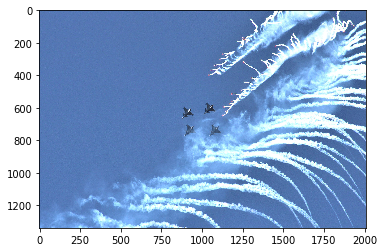

In [16]:
import zipfile as zf
import matplotlib.pyplot as plt

with zf.ZipFile("myarchive.zip", "w") as myzip:
    myzip.write("bild1.jpg")
    myzip.write("bild2.jpg")

with zf.ZipFile("myarchive.zip", "r") as myzip:
    print(myzip.namelist())
    print(myzip.getinfo("bild1.jpg"))
    myzip.extract("bild2.jpg", "myzip")
    myzip.extractall("myzip_all")
    myzip.printdir()
    with myzip.open("bild2.jpg") as myfile:
        image = plt.imread(myfile)        
    plt.imshow(image)
    plt.show()

In [17]:
import pickle, zlib

my_data = {"a number": 42, "a list": list(range(1000)), "a dict": {'a': 1, 'b': 2}}

my_data_dump = pickle.dumps(my_data)
print(len(my_data_dump))

my_data_compressed = zlib.compress(my_data_dump)
print(len(my_data_compressed))

my_data_uncompressed = zlib.decompress(my_data_compressed)

my_data_copy = pickle.loads(my_data_uncompressed)
print(my_data_copy)

2825
1926
{'a number': 42, 'a list': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

# Special file formats

In [21]:
!type config1.ini

[DEFAULT]
ServerAliveInterval = 45
Compression = yes
CompressionLevel = 9
ForwardX11 = yes

[bitbucket.org]
User = hg

[topsecret.server.com]
Port = 50022
ForwardX11 = no


In [22]:
import configparser

config = configparser.ConfigParser()
config.read("config1.ini")

sections = config.sections()
print(sections)

print(config["bitbucket.org"]["user"])

for section in config.sections():
    print("section =", section)
    keys = config[section].keys()
    for key in keys:
        print(key, "=", config[section][key])
        
config["bitbucket.org"]["user"] = "jonas"
print(config["bitbucket.org"]["user"])

with open("config2.ini", "w") as config_file:
    config.write(config_file)

['bitbucket.org', 'topsecret.server.com']
hg
section = bitbucket.org
user = hg
serveraliveinterval = 45
compression = yes
compressionlevel = 9
forwardx11 = yes
section = topsecret.server.com
port = 50022
forwardx11 = no
serveraliveinterval = 45
compression = yes
compressionlevel = 9
jonas


In [23]:

import configparser

config = configparser.ConfigParser()

config["DEFAULT"] = {
        "Rating":"No rating",
        "Length":"No length"
        }

config["Dr Who"] = {"Rating":"9/9"}
config["Firefly"] = {"Length":"Too long"}

with open("config3.ini", "w") as config_file:
    config.write(config_file)
    

In [24]:
!type config3.ini

[DEFAULT]
rating = No rating
length = No length

[Dr Who]
rating = 9/9

[Firefly]
length = Too long



In [25]:
import csv

with open('example1.csv', 'r') as csv_file:
    csv_data = csv.reader(csv_file, delimiter=',')
    for row in csv_data:
        print(row)

with open('example2.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(['Beteckning', 'Antal'])
    csv_writer.writerow(['Gurka', '2'])
    csv_writer.writerow(['Tomat', '4'])
    
l = [["Beteckning", "Antal"],["Gurka", "2"], ["Tomat", "4"]]

with open('example3.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerows(l)

['Year', 'Make', 'Model', 'Description', 'Price']
['1997', 'Ford', 'E350', 'ac, abs, moon', '3000.00']
['1999', 'Chevy', 'Venture "Extended Edition"', '', '4900.00']
['1999', 'Chevy', 'Venture "Extended Edition, Very Large"', '', '5000.00']
['1996', 'Jeep', 'Grand Cherokee', 'MUST SELL!air, moon roof, loaded', '4799.00']
